In [1]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_images(folder_path, image_size=(64, 64)):
    image_data = []

    # Iterate through each directory in the main folder
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Iterate through each file in the subdirectory
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    # If the file is an image file, load, resize, convert to array, and normalize
                    image = Image.open(file_path)
                    image = image.resize(image_size)  # Resize the image
                    image_array = np.array(image) / 255.0  # Convert to array and normalize
                    image_data.append(image_array)

    # Convert the list of arrays to a numpy array
    image_data = np.array(image_data)

    return image_data

folder_path = 'flower'
images = preprocess_images(folder_path)

In [2]:
# Define the ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [3]:
# Create a generator for the images in your folder
image_generator = train_datagen.flow_from_directory(
    folder_path,  # directory containing your images
    target_size=(64, 64),  # resize images to 64x64
    batch_size=32,
    class_mode='binary'  # assuming binary classification
)


Found 4317 images belonging to 5 classes.


In [4]:
# Generate some augmented images along with their labels
augmented_images, labels = [], []
for _ in range(5):  # Generate 5 augmented batches
    batch = next(image_generator)
    augmented_images.extend(batch[0])
    labels.extend(batch[1])

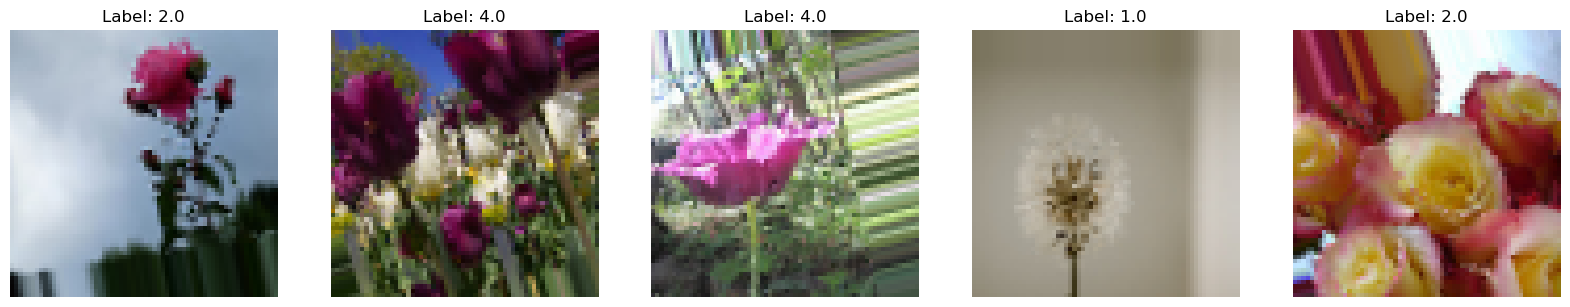

In [5]:
import matplotlib.pyplot as plt
# Display the augmented images along with their labels
num_images_to_display = min(5, len(augmented_images))  # Ensure we don't try to display more images than available
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
for i, (image, label) in enumerate(zip(augmented_images[:num_images_to_display], labels[:num_images_to_display])):
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')  # Assuming binary classification (0 or 1)

plt.show()

In [6]:
# Initialize a dictionary to store the count of images for each class
class_counts = {}

# Iterate through each subdirectory (each class)
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Count the number of images in the subdirectory
        num_images = len(os.listdir(subdir_path))
        class_counts[subdir] = num_images


In [7]:
# Display the total number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'daisy' has 764 images.
Class 'dandelion' has 1052 images.
Class 'rose' has 784 images.
Class 'sunflower' has 733 images.
Class 'tulip' has 984 images.


In [15]:
class_names = dataset.class_names
class_names

['Potato_EarlyBlight', 'Potato_LatebBlight', 'Potato_healthy']

In [16]:
# every element in the dataset is actaully a batch of 32 images 
len(dataset)

179

In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

[[[133. 112. 109.]
  [143. 122. 119.]
  [144. 123. 120.]
  ...
  [115.  94.  91.]
  [148. 127. 124.]
  [132. 111. 108.]]

 [[123. 102.  99.]
  [135. 114. 111.]
  [141. 120. 117.]
  ...
  [131. 110. 107.]
  [134. 113. 110.]
  [131. 110. 107.]]

 [[120.  99.  96.]
  [135. 114. 111.]
  [145. 124. 121.]
  ...
  [121. 100.  97.]
  [112.  91.  88.]
  [123. 102.  99.]]

 ...

 [[157. 139. 137.]
  [158. 140. 138.]
  [173. 155. 153.]
  ...
  [105.  94.  90.]
  [141. 130. 126.]
  [171. 160. 156.]]

 [[182. 164. 162.]
  [179. 161. 159.]
  [174. 156. 154.]
  ...
  [192. 181. 177.]
  [118. 107. 103.]
  [111. 100.  96.]]

 [[176. 158. 156.]
  [175. 157. 155.]
  [162. 144. 142.]
  ...
  [122. 111. 107.]
  [124. 113. 109.]
  [212. 201. 197.]]]
(256, 256, 3)


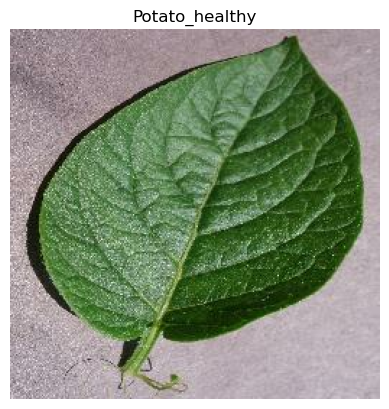

In [18]:
import matplotlib.pyplot as plt

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    plt.show()

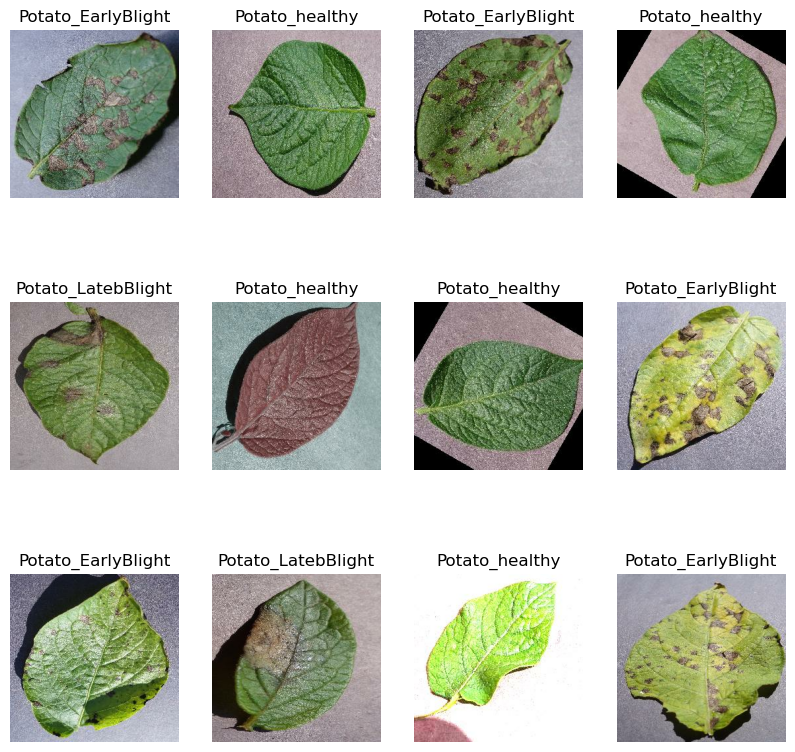

In [19]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [20]:
train_size=0.8
len(dataset)*train_size

143.20000000000002

In [21]:
train_ds=dataset.take(142)
len(train_ds)

142

In [22]:
test_ds = dataset.skip(142)
len(test_ds)

37

In [23]:
val_size=0.1
len(dataset)*val_size

17.900000000000002

In [24]:
val_ds=test_ds.take(17)
len(val_ds)

17

In [25]:
test_ds=test_ds.skip(17)
len(test_ds)

20

In [26]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split *ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [27]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds)

143

In [29]:
len(val_ds)

17

In [30]:
len(test_ds)

19

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
from tensorflow.keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1.0/255)
])

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [34]:
# building convolutional neural network
input_shape = (batch_size, image_size, image_size, channels)
n_classes=3
model = models.Sequential ([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

C:\Users\SOC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
 model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']
 )

In [37]:
history = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 394ms/step - accuracy: 0.5484 - loss: 0.9054 - val_accuracy: 0.8621 - val_loss: 0.3768
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 53s 373ms/step - accuracy: 0.8666 - loss: 0.3303 - val_accuracy: 0.8915 - val_loss: 0.2528
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 367ms/step - accuracy: 0.9058 - loss: 0.2476 - val_accuracy: 0.9246 - val_loss: 0.1922
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 358ms/step - accuracy: 0.9339 - loss: 0.1821 - val_accuracy: 0.9669 - val_loss: 0.1059
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 358ms/step - accuracy: 0.9582 - loss: 0.1197 - val_accuracy: 0.9430 - val_loss: 0.1450
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 361ms/step - accuracy: 0.9769 - loss: 0.0795 - val_accuracy: 0.9504 - val_loss: 0.1650
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 360ms/step - accuracy: 0.9793 - loss: 0.0572 - val_accuracy: 0.9926 - val_loss: 0.0306
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 362ms/step - accuracy: 0.9745 - loss: 0

In [38]:
scores = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9976 - loss: 0.0094


In [39]:
scores

[0.008955741301178932, 0.9983552694320679]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 143}

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
history.history['accuracy']

[0.6885714530944824,
 0.8683516383171082,
 0.919560432434082,
 0.9360439777374268,
 0.9551648497581482,
 0.9767032861709595,
 0.9762637615203857,
 0.9760439395904541,
 0.9857142567634583,
 0.9789010882377625,
 0.9916483759880066,
 0.9868131875991821,
 0.9835164546966553,
 0.9896703362464905,
 0.9824175834655762,
 0.9881318807601929,
 0.9925274848937988,
 0.9927472472190857,
 0.9890109896659851,
 0.9887912273406982,
 0.9821978211402893,
 0.9940659403800964,
 0.9868131875991821,
 0.9962637424468994,
 0.9916483759880066,
 0.9918681383132935,
 0.9905494451522827,
 0.9984615445137024,
 0.9909890294075012,
 0.9969230890274048,
 0.9938461780548096,
 0.9962637424468994,
 0.9973626136779785,
 0.9846153855323792,
 0.9920879006385803,
 0.9975824356079102,
 0.991428554058075,
 0.9986813068389893,
 0.9982417821884155,
 0.9982417821884155,
 0.9989010691642761,
 0.9962637424468994,
 0.9964835047721863,
 0.9918681383132935,
 0.9907692074775696,
 0.9951648116111755,
 0.9936263561248779,
 0.997582435607

In [44]:
# Evaluate the model on the test dataset
test_scores = model.evaluate(test_ds)
print(f"Test Accuracy: {test_scores[1]*100:.2f}%")

# Evaluate the model on the training dataset
train_scores = model.evaluate(train_ds, verbose=0)
print(f"Training Accuracy: {train_scores[1]*100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9988 - loss: 0.0065
Test Accuracy: 99.84%
Training Accuracy: 99.12%


In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

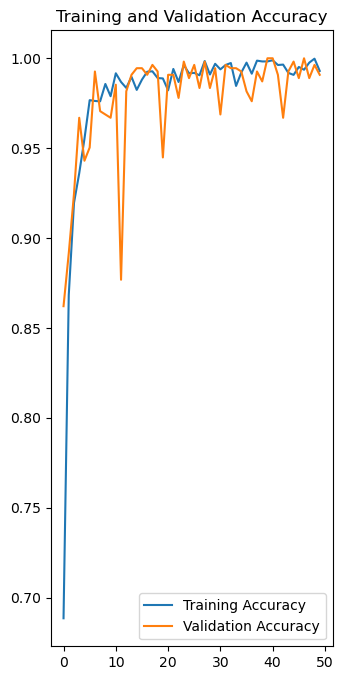

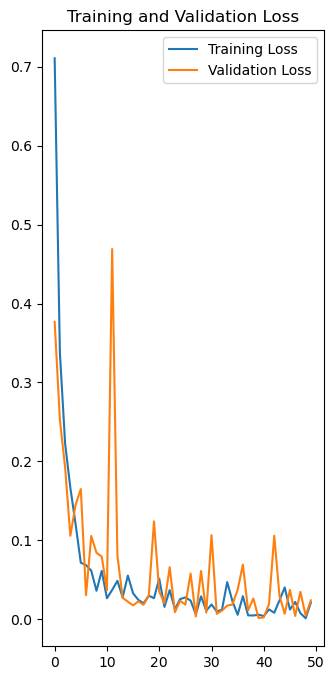

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
import numpy as np
np.argmax([2.2861544e-09, 2.1310309e-14, 1.0000000e+00])

2

first image to predict
actual label: Potato_LatebBlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
predicted label: Potato_LatebBlight


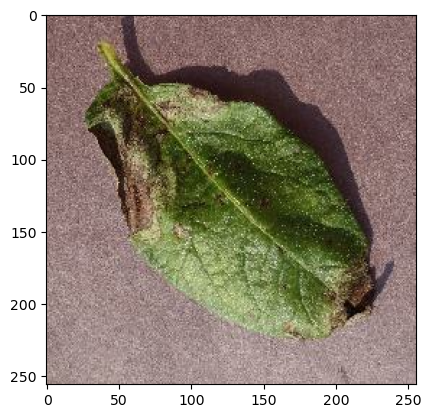

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])] )

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


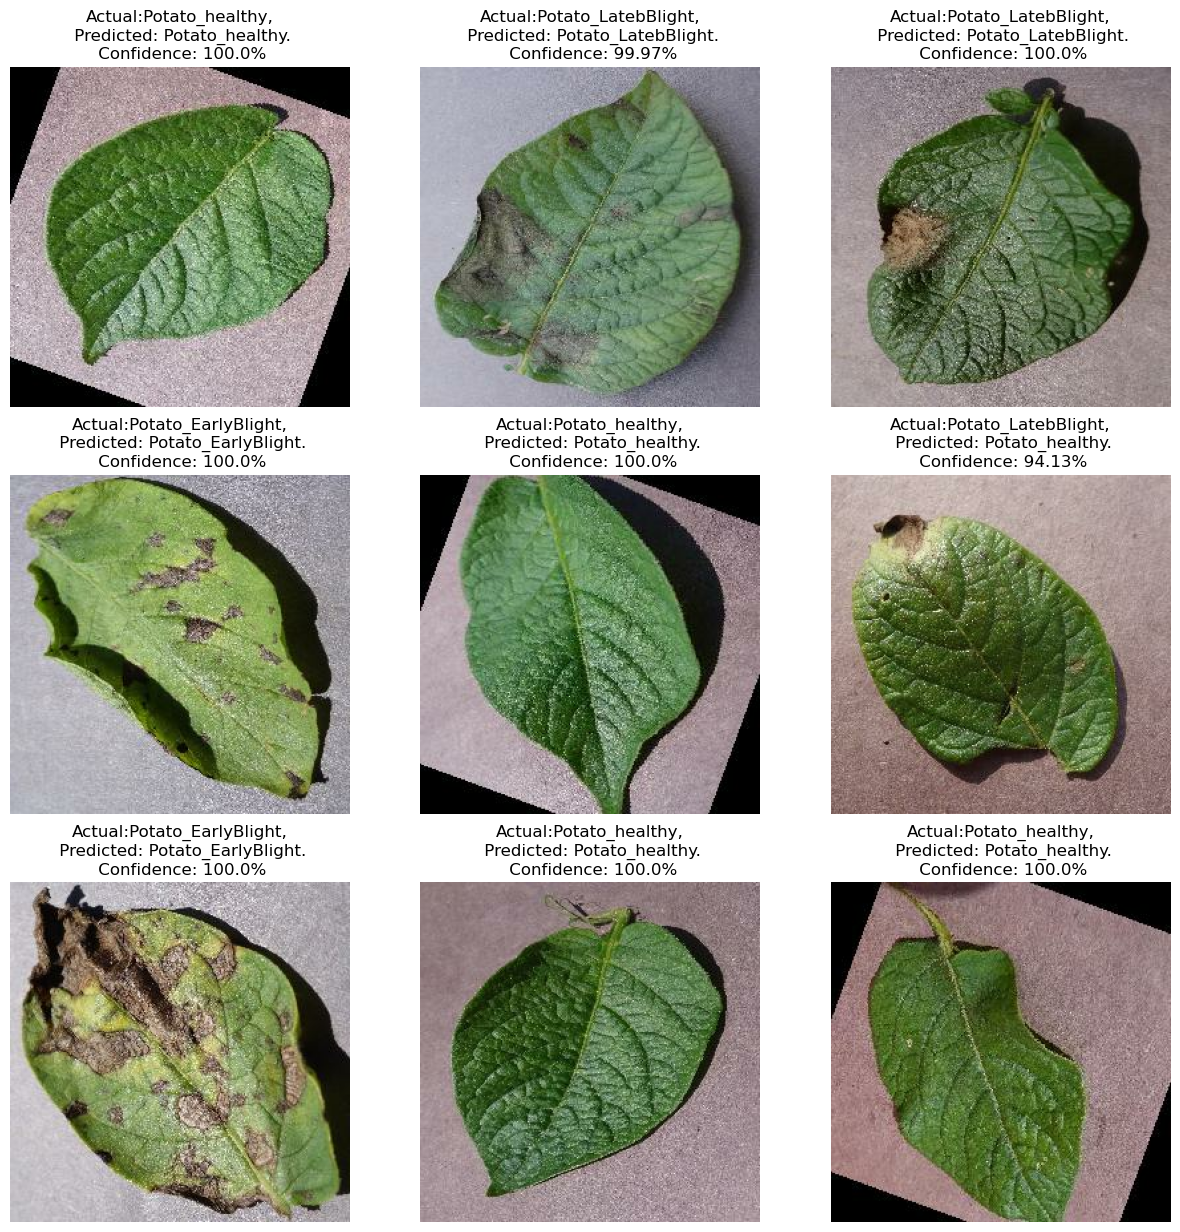

In [50]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [54]:
# Convert TensorFlow tensor to NumPy array
images_np = images.numpy()

# Flatten the image data
num_images, height, width, channels = images_np.shape
X = images_np.reshape(num_images, -1)  # Flatten each image to a 1D array
y = np.array([int(label) for label in labels])  # Convert labels to integers


In [55]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [68]:
# Train the SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=3, C=1.0)  # Polynomial kernel of degree 3 with default C value
svm_model.fit(X_train, y_train)



SVC(kernel='poly')

In [108]:

# Evaluate the SVM model on the training set
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}%")

SVM Training Accuracy: 100.00%


In [109]:

# Evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy*100:.2f}%")


SVM Validation Accuracy: 66.67%


In [67]:
# Evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy*100:.2f}%")

SVM Test Accuracy: 75.00%


In [126]:
from sklearn.linear_model import SGDClassifier
# Create and train the linear SVM model using Stochastic Gradient Descent
svm_model = SGDClassifier(loss='hinge', alpha=0.001, max_iter=1000, tol=1e-3)
svm_model.fit(X_train, y_train)


SGDClassifier(alpha=0.001)

In [127]:
# Evaluate the SVM model on the training set
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}%")

SVM Training Accuracy: 96.00%


In [128]:

# Evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy*100:.2f}%")

SVM Validation Accuracy: 66.67%


In [130]:
# Evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy*100:.2f}%")

SVM Test Accuracy: 25.00%


In [132]:
from sklearn.svm import NuSVC

# Create and train the Nu-SVC model
svm_model = NuSVC(nu=0.5, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)


NuSVC(gamma='auto')

In [133]:
# Evaluate the SVM model on the training set
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}%")

SVM Training Accuracy: 100.00%


In [134]:

# Evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy*100:.2f}%")

SVM Validation Accuracy: 33.33%


In [136]:
# Evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy*100:.2f}%")

SVM Test Accuracy: 25.00%
